**Nama : Amin Fahri**

**Program : Introduction to Python for Data Science**

**Kode Peserta : PYTN-KS01-002**

# Assignment Python 2

# Import Library and Dataset

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option("display.max.columns", None)

In [4]:
df = pd.read_csv('nyc-rolling-sales.csv')
df_raw = df
df_raw.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Preprocessing Dataset

## Cek Kesesuaian Tipe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
#menghapus kolom yang tidak relevan
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
#konversi tipe data variabel sale date menjadi date time
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [9]:
#konversi tipe data int
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
#konversi tipe data categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [11]:
#cek kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

## Identifikasi Kolom dengan Nilai Tunggal

In [12]:
# get number of unique values for each column
counts = df.nunique()
counts

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6061
GROSS SQUARE FEET                  5690
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

In [13]:
df.drop(["EASE-MENT"], axis=1, inplace=True)

## Identify Duplicate Data

In [14]:
df.duplicated().any()

True

In [15]:
df.duplicated().sum()

765

In [16]:
df.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [17]:
df.drop_duplicates().reset_index()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83778,84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
83779,84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
83780,84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
83781,84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [18]:
#agar kolom indexnya hilang dan mengganti data df sebelumnya
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


## Cek Missing Values

In [19]:
#cek missing values berupa nilai NA pada dataset
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [20]:
from numpy import nan

# replace black cells with 'nan'
df = df.replace(' ', nan)

In [21]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [22]:
#menghitung persentase missing values
df.isna().sum() /len(df) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.880847
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.880847
ADDRESS                            0.000000
APARTMENT NUMBER                  77.502596
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.097001
GROSS SQUARE FEET                 32.685628
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

## Handling Missing Values

In [23]:
df.drop(labels=['APARTMENT NUMBER'], axis=1, inplace=True)

Untuk data categorical yaitu "Tax class at present" dan "building class at present", nilai missing values (NaN) dapat diganti dengan modus dari masing-masing variabel.

In [24]:
#replacing missing values

df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

Untuk data int/float seperti "Sale Price", "Land Square Feet", dan "Gross Square Feet" dapat diganti oleh mean atau median. 

Namun, sebelumnya harus dilihat terlebih dahulu distribusi datanya melalui plot masing-masing variabel untuk mengetahui apakah data missing values (NaN) pada variabel tersebut sesuai untuk diganti dengan nilai mean atau mediannya.

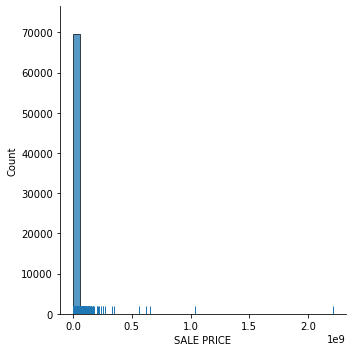

In [25]:
# plot variabel sale price
sns.displot(df['SALE PRICE'], bins=40, rug=True)

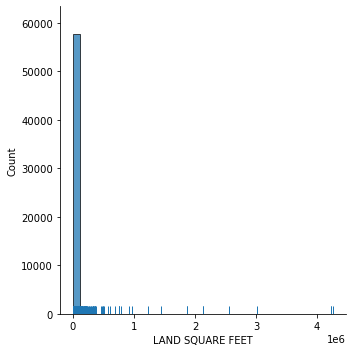

In [26]:
# plot variabel land square feet
sns.displot(df['LAND SQUARE FEET'], bins=40, rug=True)

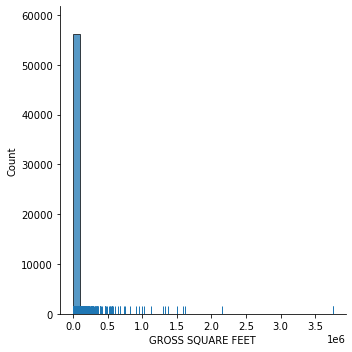

In [27]:
# plot variabel gross square feet
sns.displot(df['GROSS SQUARE FEET'], bins=40, rug=True)

In [28]:
df2 = df.dropna()

In [29]:
df2.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Measure of Central Tendency

## Mean

In [30]:
mean_price = statistics.mean(df2['SALE PRICE'])
mean_price

1158309.9487222314

In [31]:
mean_land = statistics.mean(df2['LAND SQUARE FEET'])
mean_land

3270.9037706697845

In [32]:
mean_gross = statistics.mean(df2['GROSS SQUARE FEET'])
mean_gross

3525.874749457157

## Median

In [33]:
median_price = statistics.median(df2['SALE PRICE'])
median_price

485000.0

In [34]:
median_land = statistics.median(df2['LAND SQUARE FEET'])
median_land

2133.0

In [35]:
median_gross = statistics.median(df2['GROSS SQUARE FEET'])
median_gross

1620.0

## Modus

In [36]:
mode_borough = scipy.stats.mode(df2['BOROUGH'])
mode_borough

ModeResult(mode=array([3], dtype=int64), count=array([23843]))

In [37]:
mode_neighborhood = scipy.stats.mode(df2['NEIGHBORHOOD'])
mode_neighborhood

ModeResult(mode=array(['BEDFORD STUYVESANT'], dtype=object), count=array([1429]))

In [38]:
mode_buildclass = scipy.stats.mode(df2['BUILDING CLASS CATEGORY'])
mode_buildclass

ModeResult(mode=array(['01 ONE FAMILY DWELLINGS                    '], dtype=object), count=array([14336]))

# Measure Of Spread

## Range

In [39]:
sp = df2['SALE PRICE']
lsf= df2['LAND SQUARE FEET']
gsf = df2['GROSS SQUARE FEET']

r_price = np.ptp(sp)
r_price

2210000000.0

In [40]:
r_land = np.ptp(lsf)
r_land

4228300.0

In [41]:
r_gross = np.ptp(gsf)
r_gross

3750565.0

## Variance

In [42]:
var_price = statistics.variance(df2['SALE PRICE'])
var_price

180704673693780.22

In [43]:
var_land = statistics.variance(df2['LAND SQUARE FEET'])
var_land

933292915.5861255

In [44]:
var_gross = statistics.variance(df2['GROSS SQUARE FEET'])
var_gross

852938213.028325

## Standard Deviation

In [45]:
std_price = statistics.stdev(df2['SALE PRICE'])
std_price

13442643.850589072

In [46]:
std_land = statistics.stdev(df2['LAND SQUARE FEET'])
std_land

30549.843135213076

In [47]:
std_gross = statistics.stdev(df2['GROSS SQUARE FEET'])
std_gross

29205.10594105635

# Probability Distribution

## Normal Distribution

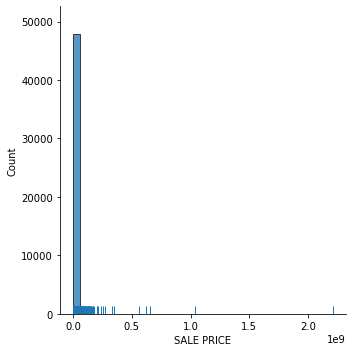

In [48]:
sns.displot(df2['SALE PRICE'], bins=40, rug=True)

In [49]:
# ambil data dari Sale Price dari 10.000 - 10.000.000
df3 = df2[(df2['SALE PRICE'] > 10000) & (df2['SALE PRICE'] < 10000000)]

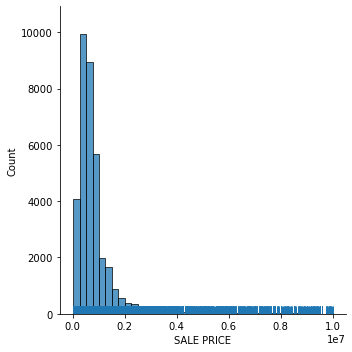

In [50]:
sns.displot(df3['SALE PRICE'], bins=40, rug=True)

In [51]:
df3['LOG_PRICE'] = np.log(df3['SALE PRICE'])

<ipython-input-51-4e237f35a575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['LOG_PRICE'] = np.log(df3['SALE PRICE'])


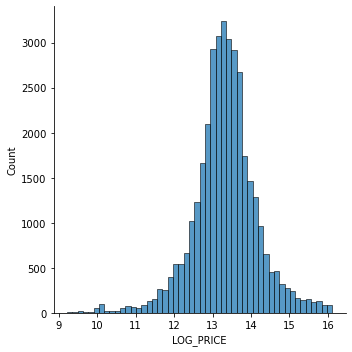

In [52]:
sns.displot(df3['LOG_PRICE'], bins=50)

# Confidence Intervals

In [53]:
df2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


Menghitung CI untuk property dengan sale price > 2.000.000 yang berlokasi di Brooklyn

In [54]:
df_price = df2[['BOROUGH','SALE PRICE']]
df_price

,BOROUGH,SALE PRICE
0,1,6625000.0
3,1,3936272.0
4,1,8000000.0
6,1,3192840.0
9,1,16232000.0
...,...,...
83778,5,450000.0
83779,5,550000.0
83780,5,460000.0
83781,5,11693337.0


In [55]:
total_borough = df_price[
    (df_price['SALE PRICE'] > 2000000) 
    & (df_price['BOROUGH'] == 3)].count()

total_borough = total_borough['BOROUGH']
total_borough

1663

In [56]:
total = df_price[df_price['SALE PRICE'] > 2000000].count()

total = total['SALE PRICE']
total

3025

In [57]:
# proporsi property dengan sale price > 1158309 di wilayah brooklyn

p_b = total_borough / total
p_b

0.5497520661157025

In [58]:
# hitung standard error
n = total
se_b = np.sqrt(p_b * (1 - p_b) / total)
se_b

0.009045792262626017

In [59]:
# membuat CI dengan z-score 1.96 untuk confidence interval 95%
z_score = 1.96
lcb = p_b - z_score* se_b #lower limit of the CI
ucb = p_b + z_score* se_b #upper limit of the CI
lcb, ucb

(0.5320223132809555, 0.5674818189504495)

Confidence interval adalah 0.53 dan 0.56

# Hypothesis Testing

In [60]:
import statsmodels.api as sm

Population: 
- Total Units in NYC Property Sales data

Parameter of Interest: 
- μ1 − μ2
- Year Built

Taraf signifikansi :
- alpha = 5% = 0.05

Hypothesis :
- H0 (Null Hypothesis) : μ1=μ2
- H1 (Alternative Hypthosis) : μ1≠μ2

In [61]:
df_unit = df2[['TOTAL UNITS','YEAR BUILT']]
df_unit.head()

,TOTAL UNITS,YEAR BUILT
0,5,1900
3,10,1913
4,6,1900
6,8,1920
9,24,1920


In [68]:
# Data year built 1913 - 2013

df_unit["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
df_p1 = df_unit[
    (df_unit['YEAR BUILT'] > 1912) &
    (df_unit['YEAR BUILT'] < 2014)]
df_p1.head()

<ipython-input-68-a340ee918517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,TOTAL UNITS,YEAR BUILT
3,10,1913
6,8,1920
9,24,1920
11,10,2009
22,24,1928


In [69]:
# Data year built > 2014

df_p2 = df_unit[(df_unit['YEAR BUILT'] > 2014)]
df_p2.head()

,TOTAL UNITS,YEAR BUILT
1457,7,2016
6643,254,2015
18256,1,2015
18257,1,2015
18432,2,2015


In [70]:
n1 = len(df_p1)
mu1 = df_p1["TOTAL UNITS"].mean()
sd1 = df_p1["TOTAL UNITS"].std()

(n1, mu1, sd1)

(35915, 2.8970903522205207, 23.156499486127128)

In [71]:
n2 = len(df_p2)
mu2 = df_p2["TOTAL UNITS"].mean()
sd2 = df_p2["TOTAL UNITS"].std()

(n2, mu2, sd2)

(1389, 2.4794816414686824, 12.175253201030891)

In [72]:
sm.stats.ztest(df_p1["TOTAL UNITS"], df_p2["TOTAL UNITS"], alternative='two-sided')

(0.6685508743196886, 0.5037820188132371)

Hypothesis Testing adalah 0.66 dan 0.50